# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

In [3]:
addressGev_LargeBox="./CSCS_Runs/Runs-18Dec2018/9000Boxsize-cs_e7-w09-Fluid///output/";
addressGev_Midrange="./CSCS_Runs/Runs-18Dec2018/1280Boxsize-cs_e7-w09-Fluid///output/";

zlist=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])
zrange=np.shape(zlist)[0]
Gev_lin_deltakess_z_all=[]
Gev_lin_zeta_zall=[]
Gev_lin_Hpi_zall=[]
Gev_lin_delta_m_zall=[]
Gev_lin_phi_zall=[]
Gev_lin_phi_prime_zall=[]

# for i in range(zrange):
#     Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_HubbleBox+"/kess_pk_cs_e2_w09_Hubble"+str(i).zfill(3)+"_delta_kess.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_HubbleBox+"/kess_pk_cs_e2_w09_Hubble"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_HubbleBox+"/kess_pk_cs_e2_w09_Hubble"+str(i).zfill(3)+"_pi_k.dat") )
#     Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_HubbleBox+"/kess_pk_cs_e2_w09_Hubble"+str(i).zfill(3)+"_delta.dat") )
#     Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_HubbleBox+"/kess_pk_cs_e2_w09_Hubble"+str(i).zfill(3)+"_phi.dat") )
#     Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_HubbleBox+"/kess_pk_cs_e2_w09_Hubble"+str(i).zfill(3)+"_phi_prime.dat") )

for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_LargeBox+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_deltaclass.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_deltacdm.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_LargeBox+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_phi_prime.dat") )


for i in range(zrange):
    Gev_lin_deltakess_z_all.append(np.loadtxt("./"+addressGev_Midrange+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_deltaclass.dat"))
#     Gev_lin_zeta_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_zeta.dat") )
#     Gev_lin_Hpi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/kess_pk_cs_e7_w09_mid"+str(i).zfill(3)+"_pi_k.dat") )
    Gev_lin_delta_m_zall.append(np.loadtxt("./"+addressGev_Midrange+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_deltacdm.dat") )
    Gev_lin_phi_zall.append(np.loadtxt("./"+addressGev_Midrange+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_phi.dat") )
    Gev_lin_phi_prime_zall.append(np.loadtxt("./"+addressGev_Midrange+"/fld_cs7_w09_pk_large_"+str(i).zfill(3)+"_phi_prime.dat") )

Class_all=[]
Class_pk_all=[]

# # Backgrounds:
# bg_Gevolution_Hubblesize=np.loadtxt("./"+addressGev_HubbleBox+"/kess_cs_e2_w09_large_background.dat")
bg_Gevolution_lin_LargeBox=np.loadtxt("./"+addressGev_LargeBox+"/ld_cs7_w09_mid_background.dat")
# bg_Gevolution_lin_midrange=np.loadtxt("./"+addressGev_Midrange+"/kess_cs_e2_w09_large_background.dat")

bg_class=np.loadtxt("./Class_Gev_IC/class_cs2_07_w09/Output/class_kess_cs_e7_w_09_newt_background.dat")
Class_all=[]
Class_phi_prime=[]
# Class_pk_all=[]
# zlist_class=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
# zlist_class=zlist
zlist_class=np.array([100.0,50.0,20.0,10.0 ,6.0,5.0,4.0,3.0,2.0,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01,0.005,0.001,0.0,])

# zlist_phiprime=[ 100 , 50, 20, 10 , 6 , 5 , 4, 3, 2 , 1 , 0]
class_high="./Class_Gev_IC/class_cs2_07_w09/";

for i in range(np.shape(zlist_class)[0]):
    Class_all.append(np.loadtxt(class_high+"/Class_kess_cs2_e7_w_09_z"+str(zlist_class[i])+"_newt.dat"))
    #     Class_pk_all.append(np.loadtxt(class_high+"/class_kess_cs_e3_newt_z"+str(i+1)+"_pk.dat"))
# for i in range(np.shape(zlist_phiprime)[0]):    
#     Class_phi_prime.append(np.loadtxt(class_high+"/Class_cs_e3_w0.9/Kessence_field_class_phi_prime_z"+str(zlist_phiprime[i])+".dat"))
maxNum=np.shape(zlist_class)[0]
z_list=zlist_class

# Background test

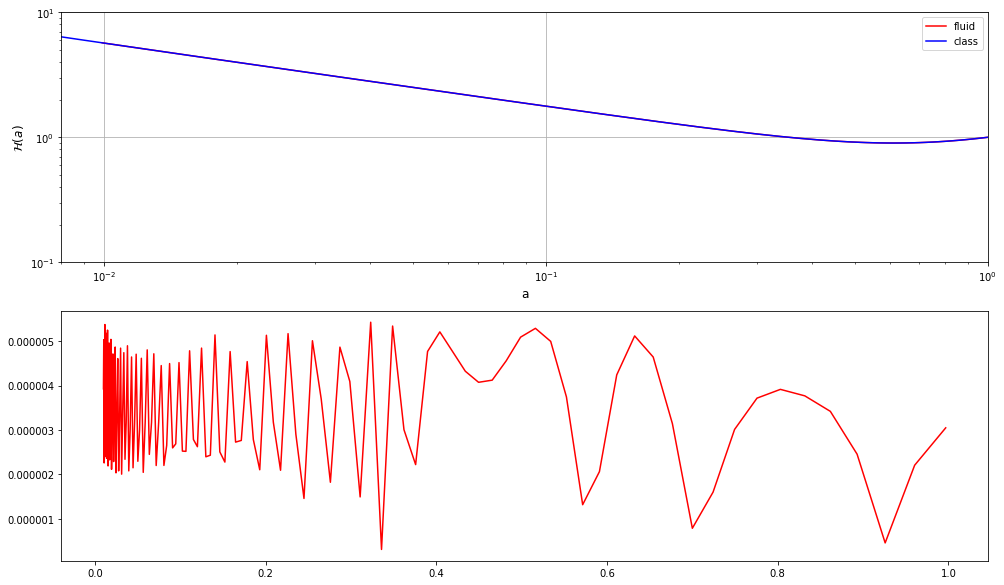

In [4]:
#################################
#################################
# Cosmological parameters.

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
# print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
H_list=[]
a_list=1./(1.+zlist)
Class_Phi_power_zall=[]

H_list=(Hubble_conf_Mpc(1./(1.+zlist[i])))
#     Class_Phi_power_zall.append(As*(class_phi_kess_zall[i][:,7])**2 *((class_phi_kess_zall[i][:,0]/kp)**(ns-1.)) );
# np.shape(Class_Phi_power_zall)

#Plot setting
plt.figure(figsize=(14,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 13)
plt.subplot(211)
#plt.loglog(bg_Gevolution_lin[:,2],2.*np.abs(np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))-bg_Gevolution_lin[:,3])/(bg_Gevolution_lin[:,3]+np.exp(interp_field_bg_lin(np.log(bg_Gevolution_lin[:,2])))),".",color="olive",
#           label=r"2|$\frac{\mathcal{H}(fluid)-\mathcal{H}(field)}{\mathcal{H}(fluid)+\mathcal{H}(field)}|$")
aclass_cs_e3=1./(1+bg_class[:,0])
a=np.arange(0.01,1,0.0001)
plt.loglog(bg_Gevolution_lin_LargeBox[:,2],bg_Gevolution_lin_LargeBox[:,3],color="red",
           label="fluid")
plt.plot(aclass_cs_e3,bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.),color="blue",
           label="class")
plt.xlim(8e-3,1)
plt.ylim(1e-1,10)
plt.xlabel("a",fontsize=12)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=12)
# plt.ylabel('log')
# plt.xlabel('log')

plt.legend()
plt.grid(True)
plt.tight_layout()

Hubble_interp=[]
interp_Hubble=(interp1d(aclass_cs_e3[:],bg_class[:,3]*aclass_cs_e3/Hubble_conf_Mpc(1.)) )
Hubble_interp=(interp_Hubble(bg_Gevolution_lin_LargeBox[:-10,2]) )


plt.subplot(212)
plt.plot(bg_Gevolution_lin_LargeBox[:-10,2],np.abs(bg_Gevolution_lin_LargeBox[:-10,3]-Hubble_interp[:])/Hubble_interp[:],color="red",label="fluid")
# plt.ylim(-1e-7,1e-7)

plt.show()

In [5]:
np.shape(aclass_cs_e3)

(4620,)

In [6]:
class_zall_interp_deltam_Hubble=[]
class_zall_interp_deltam_LargeBox=[]
class_zall_interp_deltam_Mid=[]

class_zall_interp_deltakess_Hubble=[]
class_zall_interp_deltakess_LargeBox=[]
class_zall_interp_deltakess_Mid=[]

class_zall_interp_phi_Hubble=[]
class_zall_interp_phi_LargeBox=[]
class_zall_interp_phi_Mid=[]

class_zall_interp_phi_prime_Hubble=[]
class_zall_interp_phi_prime_LargeBox=[]
class_zall_interp_phi_prime_Mid=[]

for i in range(0,zrange):
    interp_class_deltam=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
    interp_class_deltam_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )
    interp_class_deltam_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,7]) )

    interp_class_deltakess=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
    interp_class_deltakess_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )
    interp_class_deltakess_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,3]) )

    interp_class_phi=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    interp_class_phi_Large=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    interp_class_phi_Mid=(interp1d(Class_all[i][:,0],Class_all[i][:,5]) )
    
#     interp_class_phi_prime=(interp1d(Class_phi_prime[i][:,0],Class_phi_prime[i][:,1]) )

    class_zall_interp_deltam_Hubble.append(interp_class_deltam(Gev_lin_delta_m_zall[i][:,0]))
    class_zall_interp_deltam_LargeBox.append(interp_class_deltam(Gev_lin_delta_m_zall[i+zrange][:,0]))
#     class_zall_interp_deltam_Mid.append(interp_class_deltam(Gev_lin_delta_m_zall[i+22][:,0]) )

    class_zall_interp_deltakess_Hubble.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i][:,0]) )
    class_zall_interp_deltakess_LargeBox.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+zrange][:,0]) )
#     class_zall_interp_deltakess_Mid.append(interp_class_deltakess(Gev_lin_deltakess_z_all[i+22][:,0]) )

    class_zall_interp_phi_Hubble.append(interp_class_phi(Gev_lin_phi_zall[i][:,0]) )
    class_zall_interp_phi_LargeBox.append(interp_class_phi(Gev_lin_phi_zall[i+zrange][:,0]) )
#     class_zall_interp_phi_Mid.append(interp_class_phi(Gev_lin_phi_zall[i+22][:zrange,0]) )

#     class_zall_interp_phi_prime_Hubble.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i][:,0]) )
#     class_zall_interp_phi_prime_LargeBox.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+11][:,0]) )
#     class_zall_interp_phi_prime_Mid.append(interp_class_phi_prime(Gev_lin_phi_prime_zall[i+22][:,0]) )

# Matter power fluid-class vs Gevolution

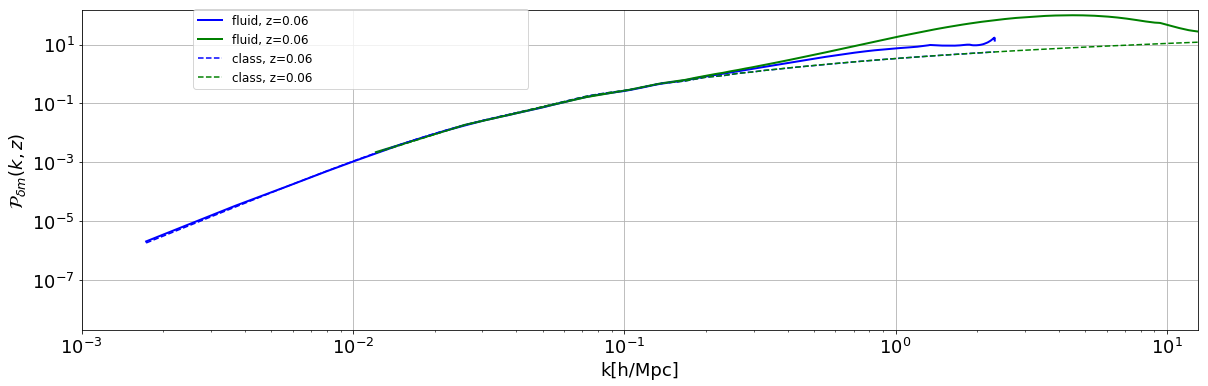

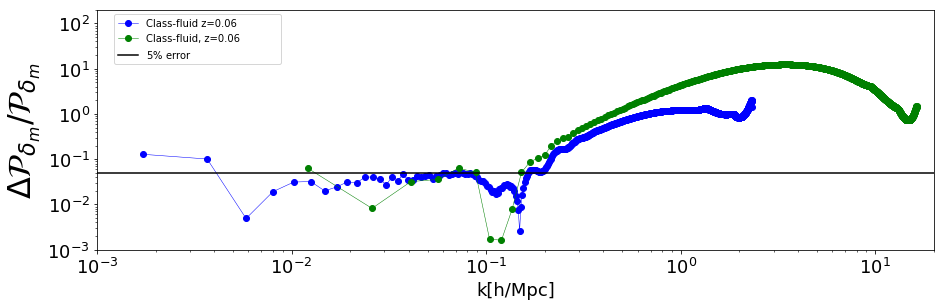

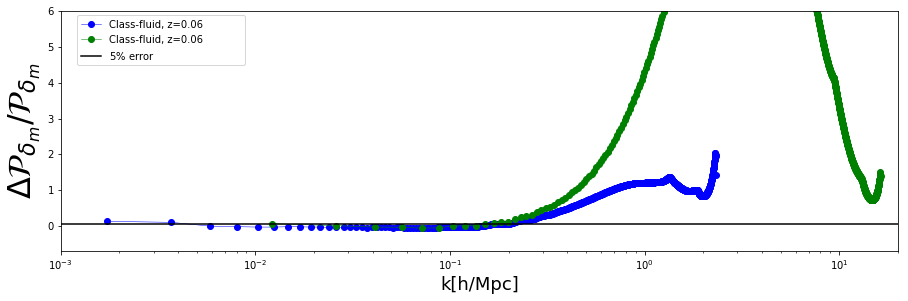

In [7]:

plt.figure(figsize=(20,20))

plt.figure(1)
# plt.subplot(311)
plt.subplot(311)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)

kmax=23
for i in range (kmax-1,kmax):
# i=0
    plt.loglog(Gev_lin_delta_m_zall[i][:,0], Gev_lin_delta_m_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,0]**0,"-",color=ColorsI[0+kmax-i],lw=2.0, label=r"fluid, z="+str(zlist[i]) )  
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0], Gev_lin_delta_m_zall[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,0]**0,"-",color=ColorsI[1+kmax-i],lw=2.0, label=r"fluid, z="+str(zlist[i]) )  
#     plt.loglog(Gev_lin_delta_m_zall[i+22][:,0], Gev_lin_delta_m_zall[i+22][:,1]/Gev_lin_delta_m_zall[i+22][:,0]**0,"-",color=ColorsI[i-6],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  

    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Hubble[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i][:,0],Class_deltam_power,"-"
               ,color=ColorsI[0+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],Class_deltam_power,"-"
               ,color=ColorsI[1+kmax-i],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) )
    
#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+22][:,0],Class_deltam_power,"-",color=ColorsI[i-9],linestyle='dashed',lw=1.5, label=r"class, z="+str(zlist_class[i]) ) 
#     plt.axvspan(9.5, 14, alpha=0.5, color='pink')

   
plt.legend(bbox_to_anchor=(0.1, 0.90, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\delta m}(k,z)$",fontsize=18)
plt.xlim(0.001,13)
plt.ylim(2.e-9,150)
plt.grid(True)
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(312)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-1,kmax):
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Hubble[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i][:,0],np.abs( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
plt.ylim(1.e-3,200)
plt.xlim(0.001,20)
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(313)
# ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-1,kmax):
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Hubble[i][:]**2)*Normlization;
    plt.semilogx(Gev_lin_delta_m_zall[i][:,0],( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.semilogx(Gev_lin_delta_m_zall[i+zrange][:,0],( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+22][:,0],( Gev_lin_delta_m_zall[i+22][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
plt.ylim(-0.7,6)
plt.xlim(0.001,20)

plt.show()



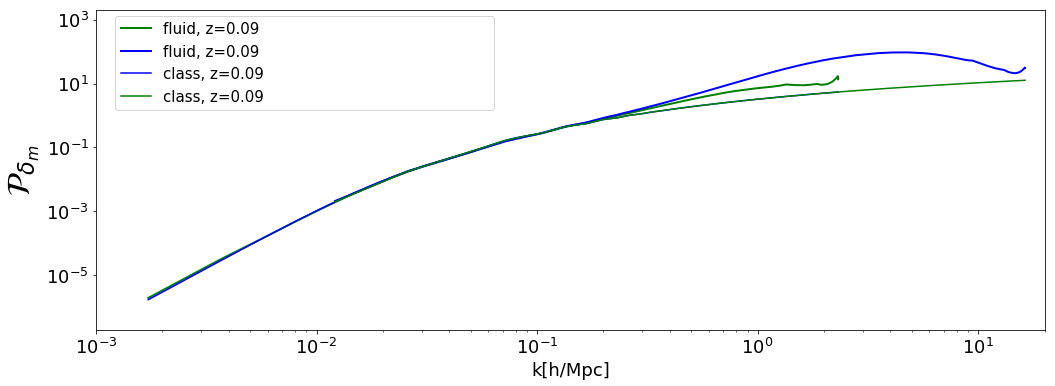

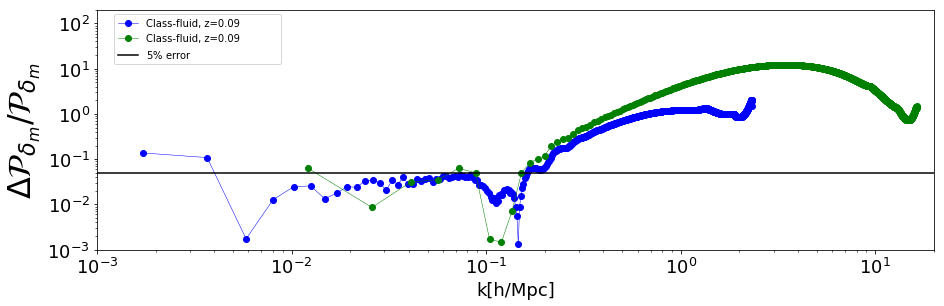

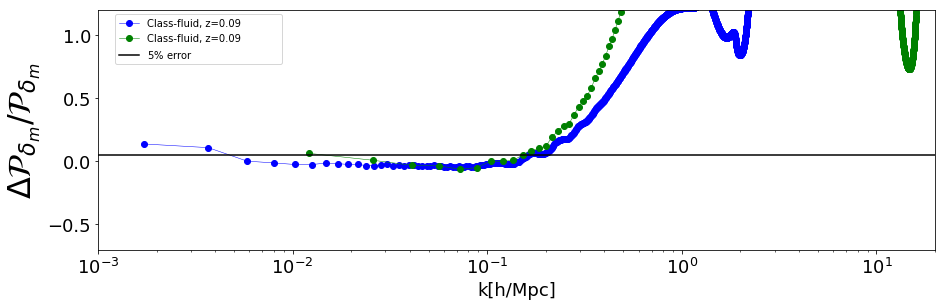

In [8]:
plt.figure(figsize=(17,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)


# Cosmological parameters.
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
plt.subplot(311)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
kmax=20
for i in range (kmax-1,kmax):
    plt.loglog(Gev_lin_delta_m_zall[i][:,0], Gev_lin_delta_m_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,0]**0,"-",color=ColorsI[1+kmax-i],lw=2.0, label=r"fluid, z="+str(zlist[i]) )  
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0], Gev_lin_delta_m_zall[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,0]**0,"-",color=ColorsI[0+kmax-i],lw=2.0, label=r"fluid, z="+str(zlist[i]) )  
#     plt.loglog(Gev_lin_delta_m_zall[i+22][:,0], Gev_lin_delta_m_zall[i+22][:,1]/Gev_lin_delta_m_zall[i+22][:,0]**0,".",color=ColorsI[i-6],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
#     plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='solid',lw=1.5)
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Hubble[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i][:,0],Class_deltam_power,"-"
               ,color=ColorsI[0+kmax-i],lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],Class_deltam_power,"-"
               ,color=ColorsI[1+kmax-i],lw=1.5, label=r"class, z="+str(zlist_class[i]) )
#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+22][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[i-6],lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
#  
#     plt.loglog(Class_high_all[i][:,0],(Class_high_all[i][:,7]**2)*Normlization/Class_high_all[i][:,0]**3,color="blue",linestyle='dashed',lw=2.5, label=r"class, z="+str(zlist_class[i]) )  

#     Class_high_all
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.40, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\delta_{m}} $",fontsize=32)
plt.xlim(0.001,20)
plt.ylim(2.e-7,2.e3)
# plt.savefig('plotdeltakdeltam.jpg', format='jpg',dpi=300, bbox_inches='tight' )
plt.show()
plt.figure(figsize=(15,15))
plt.subplot(312)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-1,kmax):
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Hubble[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i][:,0],np.abs( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_delta_m_zall[i+zrange][:,0],np.abs( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_delta_m_zall[i+22][:,0],np.abs( Gev_lin_delta_m_zall[i+22][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
plt.ylim(1.e-3,200)
plt.xlim(0.001,20)

plt.show()
plt.figure(figsize=(15,15))
plt.subplot(313)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-1,kmax):
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_Hubble[i][:]**2)*Normlization;
    plt.semilogx(Gev_lin_delta_m_zall[i][:,0],( Gev_lin_delta_m_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    plt.semilogx(Gev_lin_delta_m_zall[i+zrange][:,0],( Gev_lin_delta_m_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) )  

#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_delta_m_zall[i+22][:,0],( Gev_lin_delta_m_zall[i+22][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{m}}/\mathcal{P}_{\delta_{m}} $",fontsize=32)
plt.ylim(-0.7,1.2)
plt.xlim(0.001,20)

plt.show()


# Phi power 

('H0[1/Mpc]=100h/c: ', 0.00022534256015206366)


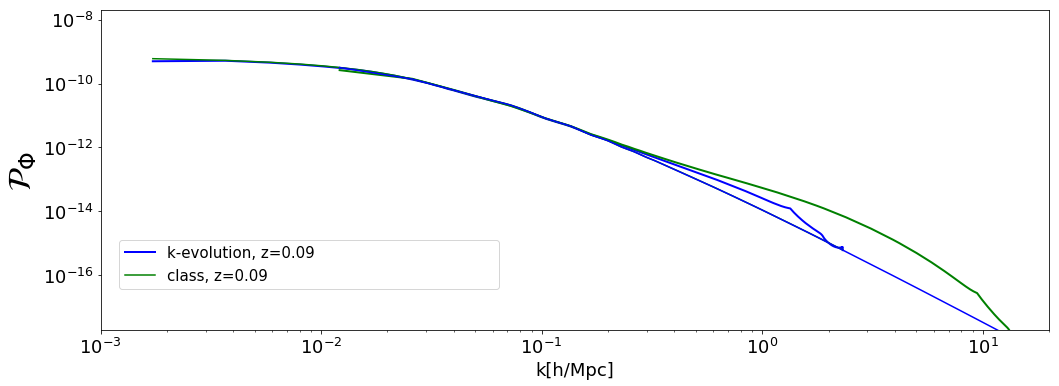

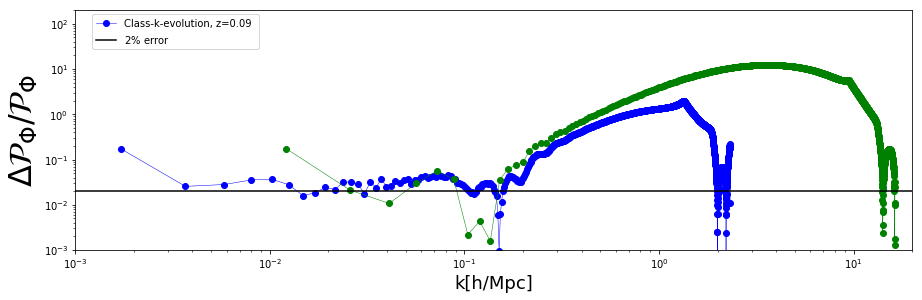

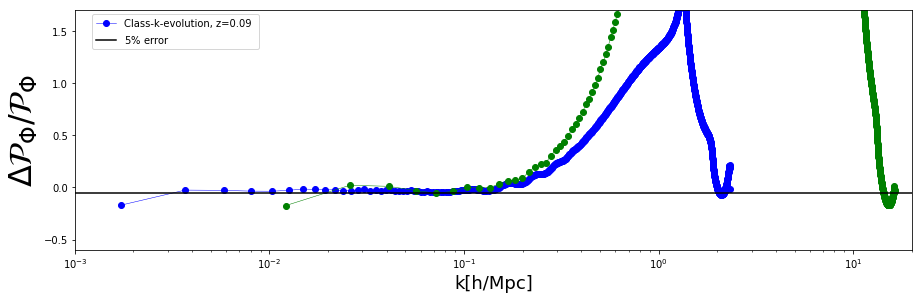

In [9]:
plt.figure(figsize=(17,20))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)


# Cosmological parameters.
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;


string=r"$N_{grid} =1920, boxsize= 1600.0 \;Mpc/h \,, \, nKe$$\_numsteps=10 \, , \, time step limit = 0.04$";

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
plt.subplot(311)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
kmax=20
for i in range (kmax-1,kmax):
    plt.loglog(Gev_lin_phi_zall[i][:,0], Gev_lin_phi_zall[i][:,1]/Gev_lin_phi_zall[i][:,0]**0,"-",color=ColorsI[0+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0], Gev_lin_phi_zall[i+zrange][:,1]/Gev_lin_phi_zall[i+zrange][:,0]**0,"-",color=ColorsI[1+kmax-i],lw=2.0 )  
#     plt.loglog(Gev_lin_phi_zall[i+22][:,0], Gev_lin_phi_zall[i+22][:,1]/Gev_lin_phi_zall[i+22][:,0]**0,"-",color=ColorsI[i-9],lw=2.0 )  
#     plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='solid',lw=1.5)

    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltaphi_power=(class_zall_interp_phi_Hubble[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_phi_zall[i][:,0],Class_deltaphi_power,"-"
               ,color=ColorsI[1+kmax-i],lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltaphi_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0],Class_deltaphi_power,"-"
               ,color=ColorsI[0+kmax-i],lw=1.5 )
    
#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltaphi_power=(class_zall_interp_phi_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_phi_zall[i+22][:,0],Class_deltaphi_power,"-"
#                ,color=ColorsI[i-8],lw=1.5)  
#  
#     plt.loglog(Class_high_all[i][:,0],(Class_high_all[i][:,7]**2)*Normlization/Class_high_all[i][:,0]**3,color="blue",linestyle='dashed',lw=2.5, label=r"class, z="+str(zlist_class[i]) )  

#     Class_high_all
plt.legend(bbox_to_anchor=(0.02, 0.18, 0.40, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\Phi} $",fontsize=32)
plt.xlim(0.001,20)
plt.ylim(2.e-18,2.e-8)
# plt.savefig('plotdeltakdeltam.jpg', format='jpg',dpi=300, bbox_inches='tight' )
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(312)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-1,kmax):
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_Hubble[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_phi_zall[i][:,0],np.abs( Gev_lin_phi_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0],np.abs( Gev_lin_phi_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5 )  

#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_phi_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_phi_zall[i+22][:,0],np.abs( Gev_lin_phi_zall[i+22][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5 )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.02,color="black",lw=1.5,label=r"$2\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\Phi}/\mathcal{P}_{\Phi} $",fontsize=32)
plt.ylim(1.e-3,200)
plt.xlim(0.001,20)
plt.show()
plt.figure(figsize=(15,15))
plt.subplot(313)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-1,kmax):
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_Hubble[i][:]**2)*Normlization;
    plt.semilogx(Gev_lin_phi_zall[i][:,0],( Gev_lin_phi_zall[i][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.semilogx(Gev_lin_phi_zall[i+zrange][:,0],( Gev_lin_phi_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5 )  

#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_phi_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_phi_zall[i+22][:,0],( Gev_lin_phi_zall[i+22][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5 )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=-0.05,color="black",lw=1.5,label=r"$5\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\Phi}/\mathcal{P}_{\Phi} $",fontsize=32)
plt.ylim(-0.6,+1.7)
plt.xlim(0.001,20)

plt.show()


('H0[1/Mpc]=100h/c: ', 0.00022534256015206366)


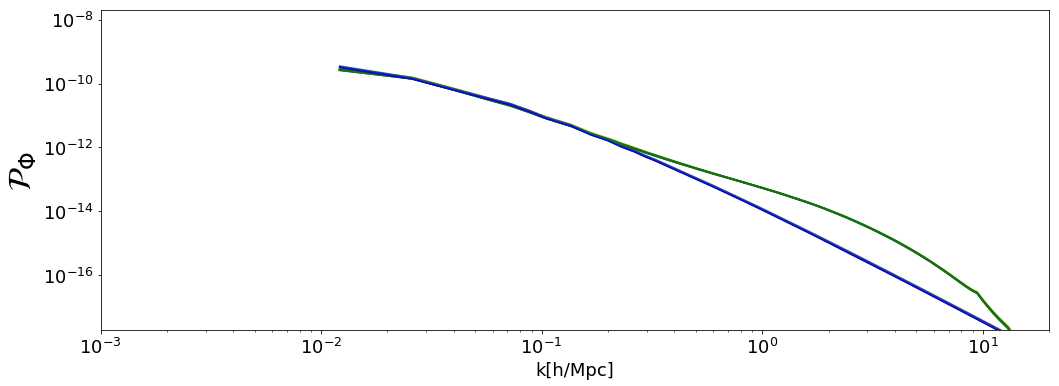

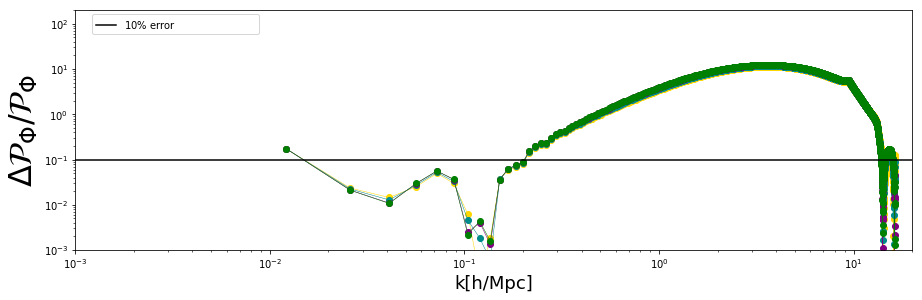

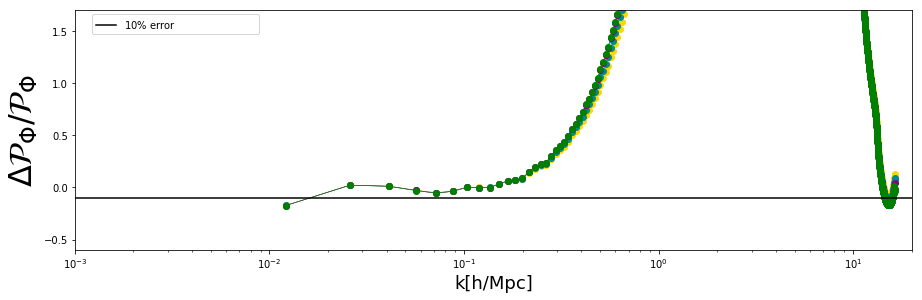

In [10]:
plt.figure(figsize=(17,20))
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)


# Cosmological parameters.
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;


string=r"$N_{grid} =1920, boxsize= 1600.0 \;Mpc/h \,, \, nKe$$\_numsteps=10 \, , \, time step limit = 0.04$";

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
plt.subplot(311)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
kmax=20
for i in range (kmax-4,kmax):
#     plt.loglog(Gev_lin_phi_zall[i][:,0], Gev_lin_phi_zall[i][:,1]/Gev_lin_phi_zall[i][:,0]**0,"-",color=ColorsI[0+kmax-i],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0], Gev_lin_phi_zall[i+zrange][:,1]/Gev_lin_phi_zall[i+zrange][:,0]**0,"-",color=ColorsI[1+kmax-i],lw=2.0 )  
#     plt.loglog(Gev_lin_phi_zall[i+22][:,0], Gev_lin_phi_zall[i+22][:,1]/Gev_lin_phi_zall[i+22][:,0]**0,"-",color=ColorsI[i-9],lw=2.0 )  
#     plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='solid',lw=1.5)

#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltaphi_power=(class_zall_interp_phi_Hubble[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_phi_zall[i][:,0],Class_deltaphi_power,"-"
#                ,color=ColorsI[1+kmax-i],lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltaphi_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0],Class_deltaphi_power,"-"
               ,color=ColorsI[0+kmax-i],lw=1.5 )
    
#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltaphi_power=(class_zall_interp_phi_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_phi_zall[i+22][:,0],Class_deltaphi_power,"-"
#                ,color=ColorsI[i-8],lw=1.5)  
#  
#     plt.loglog(Class_high_all[i][:,0],(Class_high_all[i][:,7]**2)*Normlization/Class_high_all[i][:,0]**3,color="blue",linestyle='dashed',lw=2.5, label=r"class, z="+str(zlist_class[i]) )  

#     Class_high_all
plt.legend(bbox_to_anchor=(0.02, 0.18, 0.40, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\Phi} $",fontsize=32)
plt.xlim(0.001,20)
plt.ylim(2.e-18,2.e-8)
# plt.savefig('plotdeltakdeltam.jpg', format='jpg',dpi=300, bbox_inches='tight' )
plt.show()

plt.figure(figsize=(15,15))
plt.subplot(312)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-4,kmax):
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_phi_Hubble[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_phi_zall[i][:,0],np.abs( Gev_lin_phi_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0],np.abs( Gev_lin_phi_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5 )  

#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_phi_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_phi_zall[i+22][:,0],np.abs( Gev_lin_phi_zall[i+22][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5 )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=0.1,color="black",lw=1.5,label=r"$10\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\Phi}/\mathcal{P}_{\Phi} $",fontsize=32)
plt.ylim(1.e-3,200)
plt.xlim(0.001,20)
plt.show()
plt.figure(figsize=(15,15))
plt.subplot(313)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
for i in range (kmax-4,kmax):
#     Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_phi_Hubble[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_phi_zall[i][:,0],( Gev_lin_phi_zall[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[0+kmax-i],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) ) 
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    plt.semilogx(Gev_lin_phi_zall[i+zrange][:,0],( Gev_lin_phi_zall[i+zrange][:,1]-Class_deltam_power[:])
               /Class_deltam_power[:],"o",color=ColorsI[1+kmax-i],linestyle='solid',lw=0.5 )  

#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_phi_Mid[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_phi_zall[i+22][:,0],( Gev_lin_phi_zall[i+22][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5 )  

    #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# plt.axhline(y=0.05,color="black",lw=2.5)
plt.axhline(y=-0.10,color="black",lw=1.5,label=r"$10\%$ error")
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mathcal{P}_{\Phi}/\mathcal{P}_{\Phi} $",fontsize=32)
plt.ylim(-0.6,+1.7)
plt.xlim(0.001,20)

plt.show()


('H0[1/Mpc]=100h/c: ', 0.00022534256015206366)


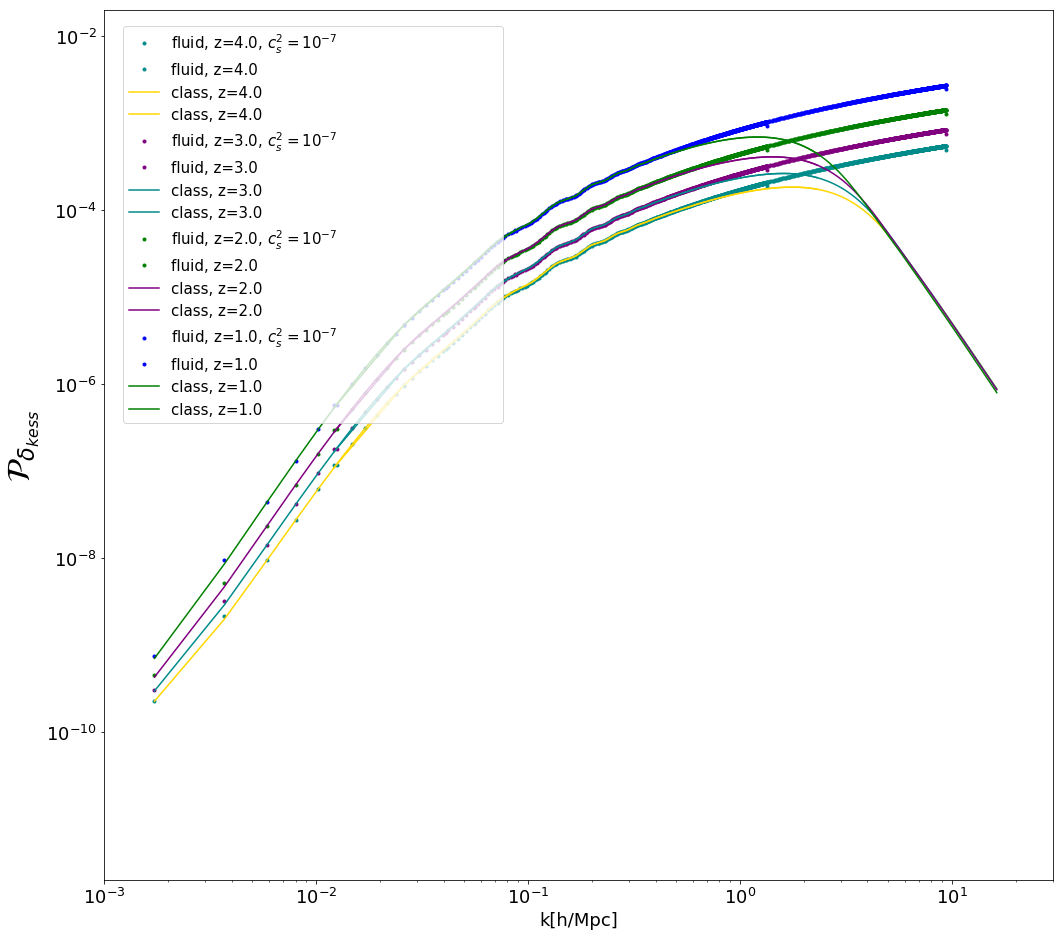

In [11]:
plt.figure(figsize=(17,16))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)


# Cosmological parameters.
As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
print("H0[1/Mpc]=100h/c: ",H0);
def Hubble_conf_Mpc(a):
    c=2.99792458*1.e5;h=0.67556;H0=100*h/c;w=-0.9;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0;
    Omega_rad=9.1671353942930788e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_kessence*(a**(-3*(1+w))))*a
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;


string=r"$N_{grid} =1920, boxsize= 1600.0 \;Mpc/h \,, \, nKe$$\_numsteps=10 \, , \, time step limit = 0.04$";

plt.figure(1)
#####################
#####################
#####################
#Blue,red,purple,olivedrab,darkblue,salmon,blueviolet,yellowgreen

#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
# plt.subplot(311)
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
kmax=10
for i in range (kmax-4,kmax):
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0], Gev_lin_deltakess_z_all[i][:,1],".",color=ColorsI[kmax-i+0],lw=2.0, label=r"fluid, z="+str(zlist[i])+", $ c_s^2=10^{-7}$" )  
    plt.loglog(Gev_lin_deltakess_z_all[i+zrange][:,0], Gev_lin_deltakess_z_all[i+zrange][:,1],".",color=ColorsI[kmax-i+0],lw=2.0, label=r"fluid, z="+str(zlist[i]) )  
#     plt.loglog(Gev_lin_deltakess_z_all[i+28][:,0], Gev_lin_deltakess_z_all[i+28][:,1]/Gev_lin_deltakess_z_all[i+28][:,0]**0,"-",color=ColorsI[i-6],lw=2.0, label=r"k-evolution, z="+str(zlist[i]) )  
#     plt.axvline(x=Hubble_conf_Mpc(a_list[i])/np.sqrt(cs2_e3)/h, color=ColorsI[i-9], linestyle='solid',lw=1.5)

    Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltakess_Hubble[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_deltakess_z_all[i][:,0],Class_deltam_power,"-"
               ,color=ColorsI[kmax-i+1],lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
    
    Normlization=As*(Gev_lin_deltakess_z_all[i+zrange][:,0]/kp)**(ns-1.);
    Class_deltam_power=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization;
    plt.loglog(Gev_lin_deltakess_z_all[i+zrange][:,0],Class_deltam_power,"-"
               ,color=ColorsI[kmax-i+1],lw=1.5, label=r"class, z="+str(zlist_class[i]) )
# Class_all[i][:,0]

#     Normlization=As*(Class_all[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(Class_all[i][:,3]**2)*Normlization;
#     plt.loglog(Class_all[i][:,0],Class_deltam_power,"."
#                ,color="red",lw=1.5, label=r"class, z="+str(zlist_class[i]) )  


#     Normlization=As*(Gev_lin_deltakess_z_all[i+28][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltakess_Mid[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_deltakess_z_all[i+28][:,0],Class_deltam_power,"-"
#                ,color=ColorsI[i-9],lw=1.5, label=r"class, z="+str(zlist_class[i]) )  
#  
#     plt.loglog(Class_high_all[i][:,0],(Class_high_all[i][:,7]**2)*Normlization/Class_high_all[i][:,0]**3,color="blue",linestyle='dashed',lw=2.5, label=r"class, z="+str(zlist_class[i]) )  

#     Class_high_all
plt.legend(bbox_to_anchor=(0.02, 0.88, 0.40, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mathcal{P}_{\delta_{kess}} $",fontsize=32)
plt.xlim(0.001,30)
plt.ylim(2.e-12,2.e-2)
# plt.savefig('plotdeltakdeltam.jpg', format='jpg',dpi=300, bbox_inches='tight' )
plt.show()
plt.figure(figsize=(15,15))
# plt.subplot(312)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (kmax-1,kmax):
#     Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltakess_Hubble[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_deltakess_z_all[i][:,0],np.abs( Gev_lin_deltakess_z_all[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-9],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) ) 
    
#     Normlization=As*(Gev_lin_deltakess_z_all[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization;
#     plt.loglog(Gev_lin_deltakess_z_all[i+zrange][:,0],np.abs( Gev_lin_deltakess_z_all[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-8],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) )  

# #     Normlization=As*(Gev_lin_phi_zall[i+28][:,0]/kp)**(ns-1.);
# #     Class_deltam_power=(class_zall_interp_deltakess_Mid[i][:]**2)*Normlization;
# #     plt.loglog(Gev_lin_deltakess_z_all[i+28][:,0],np.abs( Gev_lin_deltakess_z_all[i+28][:,1]-Class_deltam_power[:])
# #                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  

#     #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# # plt.axhline(y=0.05,color="black",lw=2.5)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{kess}} /\mathcal{P}_{\delta_{kess}}$",fontsize=32)
# plt.ylim(1.e-3,200)
# plt.xlim(0.001,20)

# plt.show()
# plt.figure(figsize=(15,15))
# plt.subplot(313)
# ax = plt.gca()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 18)
# for i in range (kmax-1,kmax):
#     Normlization=As*(Gev_lin_deltakess_z_all[i][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltakess_Hubble[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_deltakess_z_all[i][:,0],( Gev_lin_deltakess_z_all[i][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-9],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) ) 
    
#     Normlization=As*(Gev_lin_deltakess_z_all[i+zrange][:,0]/kp)**(ns-1.);
#     Class_deltam_power=(class_zall_interp_deltakess_LargeBox[i][:]**2)*Normlization;
#     plt.semilogx(Gev_lin_deltakess_z_all[i+zrange][:,0],( Gev_lin_deltakess_z_all[i+zrange][:,1]-Class_deltam_power[:])
#                /Class_deltam_power[:],"o",color=ColorsI[i-8],linestyle='solid',lw=0.5, label=r"Class-fluid, z="+str(zlist[i]) )  

# #     Normlization=As*(Gev_lin_phi_zall[i+28][:,0]/kp)**(ns-1.);
# #     Class_deltam_power=(class_zall_interp_deltakess_Mid[i][:]**2)*Normlization;
# #     plt.semilogx(Gev_lin_deltakess_z_all[i+28][:,0],( Gev_lin_deltakess_z_all[i+28][:,1]-Class_deltam_power[:])
# #                /Class_deltam_power[:],"o",color=ColorsI[i-7],linestyle='solid',lw=0.5, label=r"Class-k-evolution, z="+str(zlist[i]) )  


#     #     plt.loglog(Gev_lin_delta_m_zall[i][:,0], ,color=ColorsI[i+1],linestyle='dashed',lw=2.5, label=r"fluid-Gevolution, z="+str(zlist[i]) )  
# # plt.axhline(y=0.05,color="black",lw=2.5)
# plt.axhline(y=0.05,color="black",lw=1.5,label=r"$5\%$ error")
# plt.legend(bbox_to_anchor=(0.02, 0.88, 0.20, .102), loc=1,ncol=1,fontsize=10, mode="expand", borderaxespad=0.)
# plt.xlabel("k[h/Mpc]",fontsize=18)
# plt.ylabel(r"$\Delta\mathcal{P}_{\delta_{kess}} /\mathcal{P}_{\delta_{kess}}$",fontsize=32)
# plt.ylim(-0.7,1.2)
# plt.xlim(0.001,20)
# Class_all[i][:,0],Class_all[i][:,3]
plt.show()


# Making mu2

In [12]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s

H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class_mid=[]
mu_kev_mid=[]
mu_class_large=[]
mu_kev_large=[]
mu_class_Hubble=[]
mu_kev_Hubble=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range (maxNum):
     #Hubble
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+np.abs(coeff*class_zall_interp_deltakess_Hubble[i][:]/class_zall_interp_deltam_Hubble[i][:])
    mu_class_Hubble.append(mu_class0);
    
    
    mu_kev0=  1.+ np.abs(coeff*np.sqrt(Gev_lin_deltakess_z_all[i][:,1])/np.sqrt(Gev_lin_delta_m_zall[i][:,1]))
    mu_kev_Hubble.append(mu_kev0)
    
    
    #Large
    coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
    mu_class0=1.+(coeff*class_zall_interp_deltakess_LargeBox[i][:]/class_zall_interp_deltam_LargeBox[i][:])
    mu_class_large.append(mu_class0);
    
    mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+zrange][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+zrange][:,1]))
    mu_kev_large.append(mu_kev0)
    
#     #mid range
#     coeff=a_list[i]**(-3.*w)*Omega_kessence/Omega_m;
#     mu_class0=1.+(coeff*class_zall_interp_deltakess_Mid[i][:]/class_zall_interp_deltam_Mid[i][:])
#     mu_class_mid.append(mu_class0);
    
#     mu_kev0=  1.+ (coeff*np.sqrt(Gev_lin_deltakess_z_all[i+22][:,1])/np.sqrt(Gev_lin_delta_m_zall[i+22][:,1]))
#     mu_kev_mid.append(mu_kev0)

# |mu(k,z)|, K-evolution vs class, mu =1+ Omega_kess a^-3w delta_kess/Omega_m delta_m

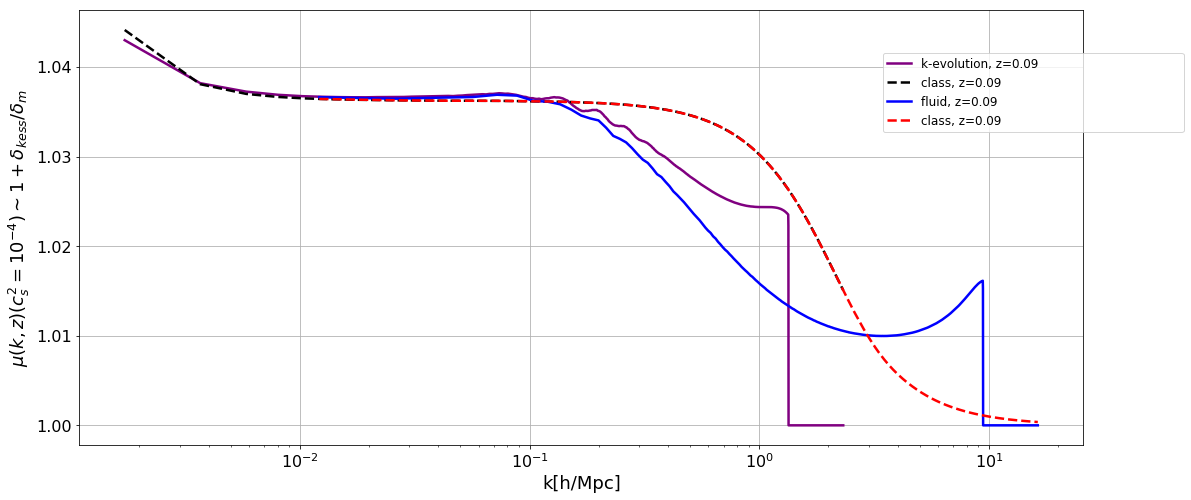

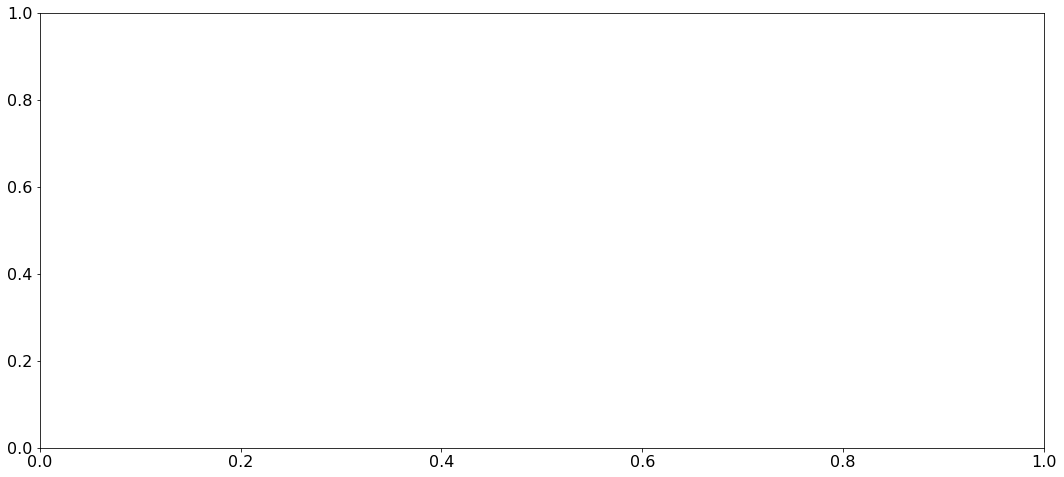

In [13]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class=[]
mu_kev=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
# plt.title(string)
# for i in range (0,2):
kmax=20
for i in range (kmax-1,kmax):
    plt.plot(Gev_lin_phi_zall[i][:,0], mu_kev_Hubble[i],color="purple",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
    plt.plot(Gev_lin_phi_zall[i][:,0], mu_class_Hubble[i],color="black",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))


    plt.plot(Gev_lin_phi_zall[i+zrange][:,0], mu_kev_large[i],color="blue",linestyle='solid',lw=2.5,  label=r"fluid, z="+str(z_list[i]))
    plt.plot(Gev_lin_phi_zall[i+zrange][:,0], mu_class_large[i],color="red",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))

#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_kev_mid[i],color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i],color="brown",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
plt.legend(bbox_to_anchor=(0.8, 0.80, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mu(k,z) (c_s^2 =10^{-4}) \sim 1+ \delta_{kess}/\delta_m$",fontsize=18)
# plt.xlim(0.01,20.)
plt.xscale('log')
# plt.yscale('log')

# plt.ylim(1.0,1.06)
plt.grid(True)
plt.show()


# Making mu

In [75]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-7;
c=2.99792458*1.e5; #Km/s

H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class_mid=[]
mu_kev_mid=[]
mu_class_large=[]
mu_kev_large=[]
mu_class_Hubble=[]
mu_kev_Hubble=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
for i in range (maxNum):
     #Hubble
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    P_phi_class=(class_zall_interp_phi_Hubble[i][:]**2)*Normlization;
    
    Normlization=As*(Gev_lin_phi_zall[i][:,0]/kp)**(ns-1.);
    P_m_class=(class_zall_interp_deltam_Hubble[i][:]**2)*Normlization;
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu_class0=coeff * Gev_lin_phi_zall[i][:,0]**2 *  np.sqrt(P_phi_class/P_m_class)
    mu_class_Hubble.append(mu_class0);
    
    mu_kev0=  coeff * Gev_lin_phi_zall[i][:,0]**2 * np.sqrt(Gev_lin_phi_zall[i][:,1]/Gev_lin_delta_m_zall[i][:,1])
    mu_kev_Hubble.append(mu_kev0)
    
    
    #Large
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    P_phi_class=(class_zall_interp_phi_LargeBox[i][:]**2)*Normlization;
    
    Normlization=As*(Gev_lin_phi_zall[i+zrange][:,0]/kp)**(ns-1.);
    P_m_class=(class_zall_interp_deltam_LargeBox[i][:]**2)*Normlization;
    coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
    mu_class0=coeff * Gev_lin_phi_zall[i+zrange][:,0]**2 *  np.sqrt(P_phi_class/P_m_class)
    mu_class_large.append(mu_class0);
    
    mu_kev0=  coeff * Gev_lin_phi_zall[i+zrange][:,0]**2 * np.sqrt(Gev_lin_phi_zall[i+zrange][:,1]/Gev_lin_delta_m_zall[i+zrange][:,1])
    mu_kev_large.append(mu_kev0)
    
    #mid range
#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     P_phi_class=(class_zall_interp_phi_Mid[i][:]**2)*Normlization;
    
#     Normlization=As*(Gev_lin_phi_zall[i+22][:,0]/kp)**(ns-1.);
#     P_m_class=(class_zall_interp_deltam_Mid[i][:]**2)*Normlization;
#     coeff=2. * a_list[i]/(3.*Hubble_conf_Mpc(1.)**2 * Omega_m)
#     mu_class0=coeff * Gev_lin_phi_zall[i+22][:,0]**2 *  np.sqrt(P_phi_class/P_m_class)
#     mu_class_mid.append(mu_class0);
    
#     mu_kev0=  coeff * Gev_lin_phi_zall[i+22][:,0]**2 * np.sqrt(Gev_lin_phi_zall[i+22][:,1]/Gev_lin_delta_m_zall[i+22][:,1])
#     mu_kev_mid.append(mu_kev0)

# |mu(k,z)|, K-evolution vs class, mu =k^2 phi/(3/2 H0^2 Omega_m0/a delta_m)

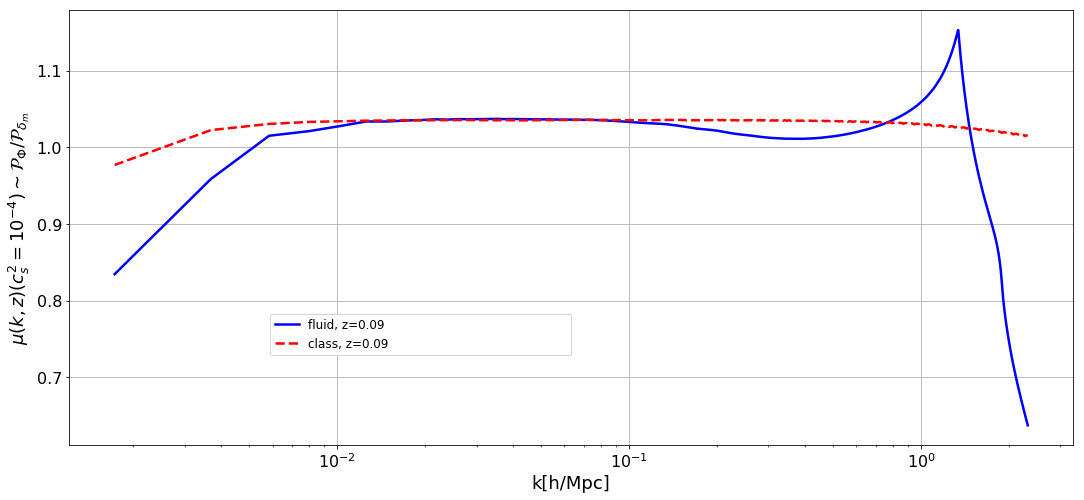

In [77]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class=[]
mu_kev=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
# plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
# plt.title(string)
# for i in range (0,2):
kmax=20
for i in range (kmax-1,kmax):
    plt.plot(Gev_lin_phi_zall[i][:,0], mu_kev_Hubble[i]*h*h,color="blue",linestyle='solid',lw=2.5,  label=r"fluid, z="+str(z_list[i]))
    plt.plot(Gev_lin_phi_zall[i][:,0], mu_class_Hubble[i]*h*h,color="red",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))


#     plt.plot(Gev_lin_phi_zall[i+zrange][:,0], mu_kev_large[i]*h*h,color="blue",linestyle='solid',lw=2.5,  label=r"fluid, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+zrange][:,0], mu_class_large[i]*h*h,color="red",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))

#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_kev_mid[i]*h*h,color="blue",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.plot(Gev_lin_phi_zall[i+22][:,0], mu_class_mid[i]*h*h,color="red",linestyle='dashed',lw=2.5,  label=r"class, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
plt.legend(bbox_to_anchor=(0.2, 0.20, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mu(k,z)(c_s^2 =10^{-4}) \sim \mathcal{P}_{\Phi}/\mathcal{P}_{\delta_m}$",fontsize=18)
# plt.xlim(0.01,20.)
plt.xscale('log')
# plt.ylim(0.4,1.1)
plt.grid(True)
plt.show()


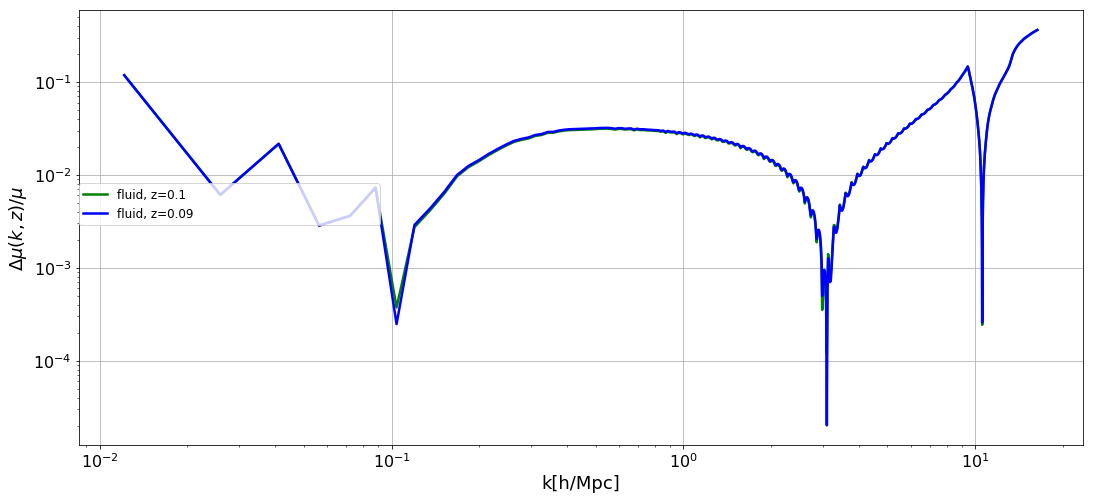

In [46]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class=[]
mu_kev=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
# plt.title(string)
# for i in range (0,2):
kmax=20
for i in range (kmax-2,kmax):
#     plt.plot(Gev_lin_phi_zall[i][:,0], np.abs(mu_kev_Hubble[i]-mu_class_Hubble[i])/mu_class_Hubble[i],color=ColorsI[i],linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))

    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0], np.abs(mu_kev_large[i]-mu_class_large[i])/mu_class_large[i],color=ColorsI[kmax-i-0],linestyle='solid',lw=2.5,  label=r"fluid, z="+str(z_list[i]))

#     plt.loglog(Gev_lin_phi_zall[i+22][:,0], (mu_kev_mid[i]-mu_class_mid[i])/mu_class_mid[i],color=ColorsI[i],linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
plt.legend(bbox_to_anchor=(0.0, 0.50, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\Delta\mu(k,z)/\mu$",fontsize=18)
# plt.xlim(0.01,20.)
plt.xscale('log')
# plt.ylim(2.e-14,1.e-7)
plt.grid(True)
plt.show()


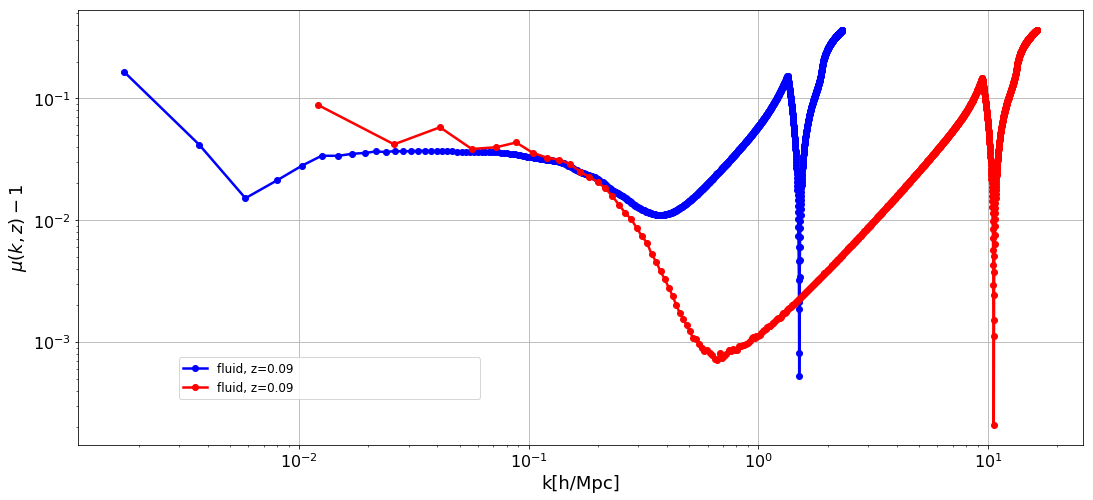

In [47]:

As=2.215*1.e-9;
h=0.67556;
kp=0.05/h; 
ns=0.9619;
cs2_e3=1.e-6;
c=2.99792458*1.e5; #Km/s
# Boxsize=320.;
# c_gev=2997.92458; #[100km/s]
# H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
# print("H0[1/Mpc]=100h/c: ",H0);
w=-0.9;
mu_class=[]
mu_kev=[]
plt.figure(figsize=(18,8))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
plt.figure(1)

# for i in range (maxNum-1,maxNum):
Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
Omega_m=Omega_b + Omega_cdm;
Omega_rad=9.1671353942930788e-05
Omega_kessence=1.-Omega_m-Omega_rad
w=-0.9;
a_list=1./(1.+zlist)
H_list=(Hubble_conf_Mpc(1./(1.+zlist)))
# plt.title(string)
# for i in range (0,2):

kmax=20
for i in range (kmax-1,kmax):
    plt.loglog(Gev_lin_phi_zall[i][:,0], np.abs(mu_kev_Hubble[i]*h*h-1),"o",color="blue",linestyle='solid',lw=2.5,  label=r"fluid, z="+str(z_list[i]))


    plt.loglog(Gev_lin_phi_zall[i+zrange][:,0], np.abs(mu_kev_large[i]*h*h-1),"o",color="red",linestyle='solid',lw=2.5,  label=r"fluid, z="+str(z_list[i]))

#     plt.loglog(Gev_lin_phi_zall[i+22][:,0], np.abs(mu_kev_mid[i]*h*h-1),"o",color="green",linestyle='solid',lw=2.5,  label=r"k-evolution, z="+str(z_list[i]))
#     plt.axhline(1. + ((Omega_kessence/Omega_m)*(1+w)/(1-3.*w) )* (1./(1.+z_list[i]))**(-3.*w)  )
plt.legend(bbox_to_anchor=(0.1, 0.10, 0.3, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=18)
plt.ylabel(r"$\mu(k,z)-1$",fontsize=18)
# plt.xlim(0.01,20.)
plt.xscale('log')
# plt.ylim(2.e-14,1.e-7)
plt.grid(True)
plt.show()
